In [228]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1.	Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами $$(a,sigma^2).$$

In [229]:
n = 145
q = 1.95
k = 5
a = -5
sigma = 4

In [230]:
s = np.random.normal(a, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(f'Оценка a: {a_estimate}, Оценка sigma: {sigma_estimate}')


Оценка a: -5.49855618678716, Оценка sigma: 3.685644896027948


In [231]:
quants = np.quantile(s, [0.25, 0.75])
print(f'Квартиль 25%: {quants[0]}, Квартиль 75%: {quants[1]}')

Квартиль 25%: -7.61352999918542, Квартиль 75%: -2.8199399930919142


1.1.	Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, указанном в Вашем варианте. Вычислить средствами Python сумму абсолютных частот. Построить диаграмму абсолютных частот.

Абсолютные частоты: [10. 10. 21. 42. 31. 23.  5.  3.]
Границы интервалов: [-14.11777574 -11.79916452  -9.48055331  -7.16194209  -4.84333088
  -2.52471967  -0.20610845   2.11250276   4.43111398]
Сумма абсолютных частот: 145.0


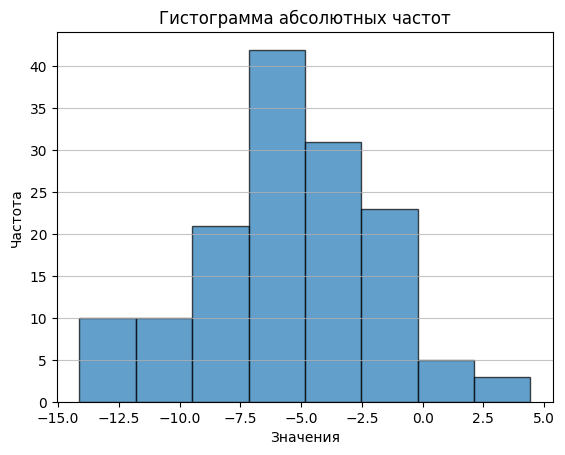

In [232]:
h=np.histogram_bin_edges(s, bins='scott')
absolute_frequencies, bin_edges, ignored = plt.hist(s, bins=h, edgecolor='black', alpha=0.7)
print(f'Абсолютные частоты: {absolute_frequencies}')
print(f'Границы интервалов: {bin_edges}')

sum_absolute_frequencies = np.sum(absolute_frequencies)
print(f'Сумма абсолютных частот: {sum_absolute_frequencies}')

plt.title(f'Гистограмма абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()


1.2.	Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить диаграмму относительных частот.

Относительные частоты по интервалам: [0.06896552 0.06896552 0.14482759 0.28965517 0.2137931  0.15862069
 0.03448276 0.02068966]
Сумма относительных частот: 1.0


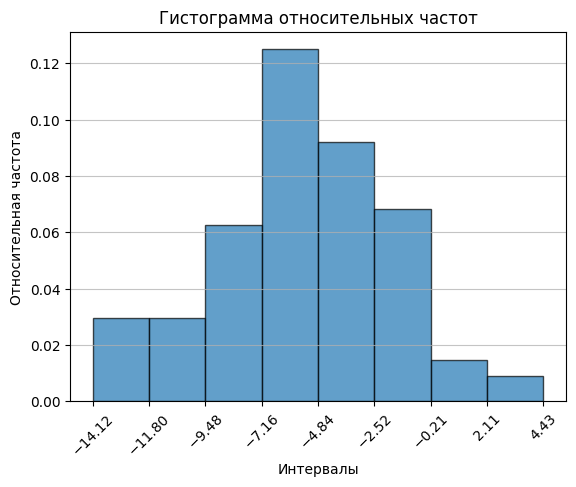

In [233]:
# Вычисление относительных частот
relative_frequencies = absolute_frequencies / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

sum_relative_frequencies = np.sum(relative_frequencies)
print(f'Сумма относительных частот: {sum_relative_frequencies}')

plt.hist(s, bins=h, density=True, edgecolor='black', alpha=0.7)
plt.title('Гистограмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.xticks(bin_edges, rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2.	Для визуализации данных: #

2.1.	Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

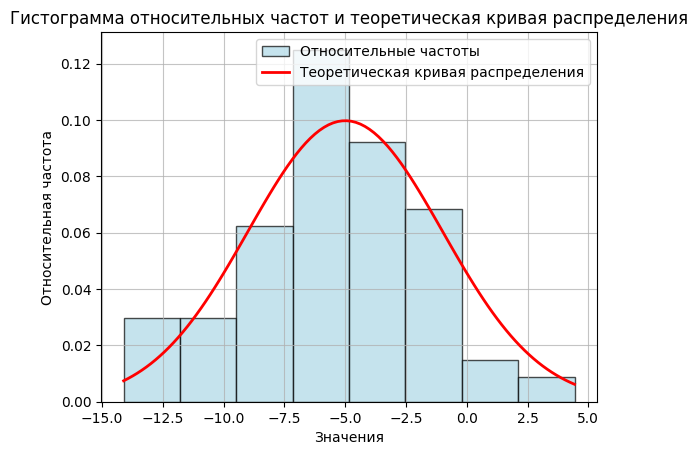

In [234]:
# Построение гистограммы относительных частот
plt.hist(s, bins=h, density=True, color="lightblue", edgecolor="black", alpha=0.7, label="Относительные частоты")

# Построение теоретической кривой распределения
x = np.linspace(min(s), max(s), 100)
y = norm.pdf(x, a, sigma)  # Теоретическая плотность вероятности
plt.plot(x, y, color='red', label='Теоретическая кривая распределения', linewidth=2)

# Настройки графика
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.legend()
plt.grid(alpha=0.75)
plt.show()

2.2. Построить гистограмму абсолютных частот и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

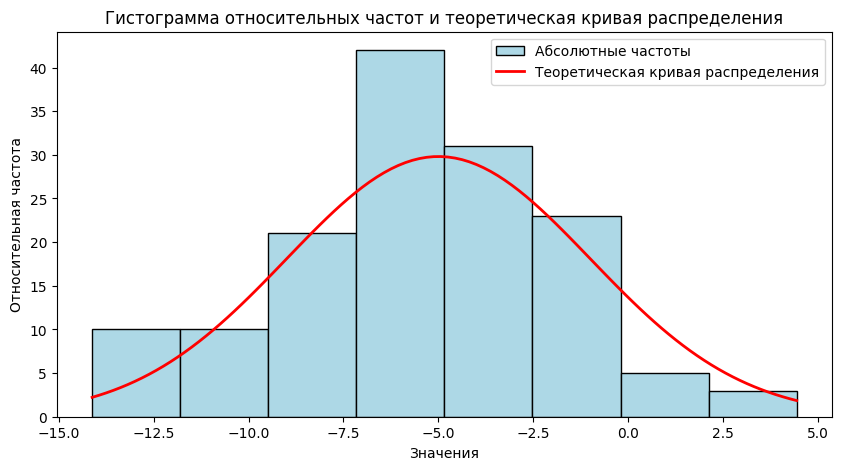

In [235]:
plt.figure(figsize=(10, 5))
# Построение гистограммы относительных частот
plt.hist(s, bins=h, color="lightblue", edgecolor="black", label="Абсолютные частоты")

# Построение теоретической кривой распределения
x = np.linspace(min(s), max(s), 100)
y = norm.pdf(x, a, sigma) * n * (h[-1] - h[0]) / len(h) # Теоретическая плотность вероятности
plt.plot(x, y, color='red', label='Теоретическая кривая распределения', linewidth=2)

# Настройки графика
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.legend()
plt.show()

2.3. Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения случайной величины X, разместив их на одном рисунке.

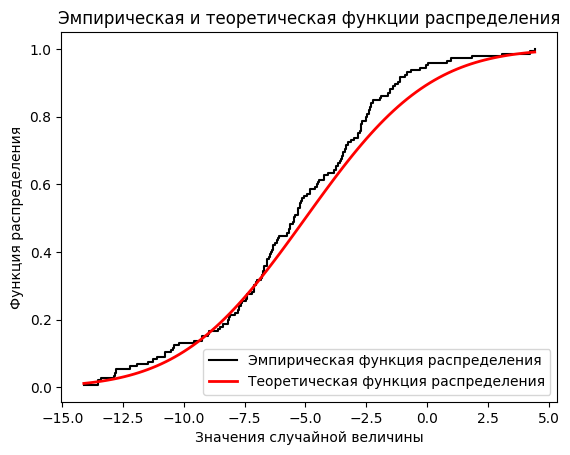

In [236]:
# Сортируем выборку для построения эмпирической функции распределения
s_sorted = np.sort(s)
# Вычисляем кумуляту относительных частот (ECDF)
empirical_cdf = np.arange(1, n + 1) / n

# Создаем значения для теоретической функции распределения (CDF)
x = np.linspace(min(s_sorted), max(s_sorted), 100)
theoretical_cdf = norm.cdf(x, a, sigma)

# Построение графика эмпирической и теоретической функции распределения
plt.step(s_sorted, empirical_cdf, where='post', label="Эмпирическая функция распределения", color="black")
plt.plot(x, theoretical_cdf, label="Теоретическая функция распределения", color="red", linewidth=2)
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения случайной величины")
plt.ylabel("Функция распределения")
plt.legend()
plt.show()

2.4. Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

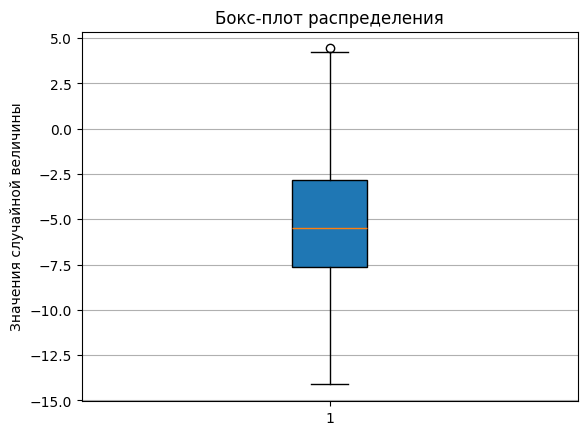

In [237]:
plt.boxplot(s, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

# Отображение графика
plt.show()

A)	<strong>Какова Ваша оценка вероятности попадания значений случайной величины X в k-ый интервал полученной группировки?</strong></br>
    Ответ: (k = 5) Для оценки вероятности попадания значений в 5-й интервал, </br>
    используем относительную частоту, соответствующую этому интервалу.

B) <b> Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике?</b></br>
    Ответ: Геометрическую интерпретацию этой оценки содержит гистограмма относительных частот

C)	<b>Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений</br>
    случайной величины X в k-ый интервал, покажите ее на графике.</b></br>
    Ответ: Геометрическую интерпретацию вероятности попадания значений СВ X во 2-ой интервал содержит гистограмма</br> 
    абсолютных частот и теоретическая плотность. На этом графике высота столбцов гистограммы показывает</br> 
    абсолютное количество наблюдений, попадающих в каждый интервал, что непосредственно связано с вероятностью 
    попадания значений в эти интервалы.(16 ячейка)

D)	<b>Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки?</br> 
    А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?</b></br> 
    Ответ: Значение ИФР в правой границе интервала можно оценить, используя относительные частоты значений, которые попадают</br>
    в этот интервал, и все предыдущие интервалы. Это можно сделать, суммируя относительные частоты всех интервалов до 2го включительно.</br>
    Точное значение ИФР в правой границе для нормального распределения можно вычислить с помощью функции</br>
    распределения нормального распределения

In [238]:
print(f"Оценка вероятности попадания значений в 5-й интервал: {relative_frequencies[5]}")

Оценка вероятности попадания значений в 5-й интервал: 0.15862068965517243


Относительные частоты по интервалам: [0.06896552 0.06896552 0.14482759 0.28965517 0.2137931  0.15862069
 0.03448276 0.02068966]
Сумма относительных частот: 1.0


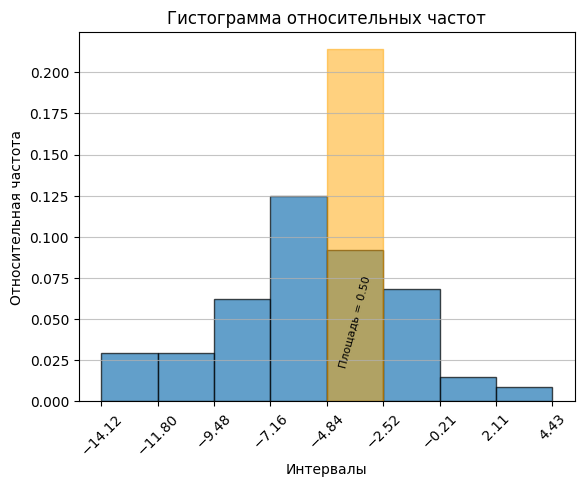

In [242]:
# Вычисление относительных частот
relative_frequencies = absolute_frequencies / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

sum_relative_frequencies = np.sum(relative_frequencies)
print(f'Сумма относительных частот: {sum_relative_frequencies}')

plt.hist(s, bins=h, density=True, edgecolor='black', alpha=0.7)
plt.title('Гистограмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.xticks(h, rotation=45)
plt.grid(axis='y', alpha=0.75)


# Обозначение пятого интервала
second_interval_start = h[4] 
second_interval_end = h[5]    

# Площадь второго интервала
area_second_interval = relative_frequencies[4] * np.diff(h)[4]

# Добавление выделения второго интервала
plt.fill_betweenx([0, relative_frequencies[4]], second_interval_start, second_interval_end, 
                  color='orange', alpha=0.5)


# Добавление текста с площадью внутри гистограммы
text_y_position = relative_frequencies[4] * 0.1  # Позиция текста внутри гистограммы
plt.text((second_interval_start + second_interval_end) / 2, text_y_position, f'Площадь = {area_second_interval:.2f}', 
         horizontalalignment='center', fontsize=8, color='black', rotation=75)
plt.show()

## 3.	Используя таблицу значений функции Лапласа, найти вероятность P(|X - M(X)| < q * σ(X))


P(|X-M(X)| < qsigma) = 2Ф(qsigma/sigma) = 2Ф(q) = 2Ф(1,95) = 0,949

3.1 Найти вероятность (*), используя встроенные функции Python.

In [185]:
probability = norm.cdf(q) - norm.cdf(-q)
print(f"Вероятность P(|X - MX| < qσ): {probability:.3f}")

Вероятность P(|X - MX| < qσ): 0.949


3.2. Найдите по выборке оценку вероятности (*)

In [186]:
def probability(s):
    mean = np.mean(s)
    sigma = np.std(s)

    lower_bound = mean - q * sigma
    upper_bound = mean + q * sigma

    probability = np.mean((s > lower_bound) & (s < upper_bound))
    return probability

print(f"Оценка вероятности P(|X - M(X)| < {q} * sigma): {probability(s):.3f}")

Оценка вероятности P(|X - M(X)| < 1.95 * sigma): 0.945


3.3. Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).

In [191]:
large_sample = np.random.normal(a, sigma, 50 * n)
print(f"Оценка вероятности по увеличенной выборке: {probability(large_sample)}")

Оценка вероятности по увеличенной выборке: 0.9486896551724138


## 4.Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса двумя способами:

4.1.  первый способ –непосредственное применение формул для вычисления   точечных оценок;

In [156]:
# Математическое ожидание
mean_estimate = np.sum(s) / n

# Медиана
ranked_sample = sorted(s)
mid_index = n // 2
median_estimate = ranked_sample[mid_index]

# Дисперсия
variance_estimate = np.sum((s - mean_estimate) ** 2) / n

# Стандартное отклонение 
std_estimate = np.sqrt(variance_estimate)

# Коэффициент асимметрии 
coefficient_asymmetry_estimate = np.sum((s - mean_estimate) ** 3) / (n * std_estimate ** 3)

# Эксцесс
excess_estimate = np.sum((s - mean_estimate) ** 4) / (n * std_estimate ** 4) - 3

print(f"Математическое ожидание: {mean_estimate}")
print(f"Медиана: {median_estimate}")
print(f"Дисперсия: {variance_estimate}")
print(f"Стандартное отклонение: {std_estimate}")
print(f"Коэффициент ассиметрии: {coefficient_asymmetry_estimate}")
print(f"Эксцесс: {excess_estimate}")

Математическое ожидание: -5.117856134413955
Медиана: -4.942056248011913
Дисперсия: 16.478514807482807
Стандартное отклонение: 4.059373696456487
Коэффициент ассиметрии: 0.22898455289420444
Эксцесс: 0.22294446550396652


4.2.  второй способ – применение встроенных функций Python, например,  describe, std, mean  и т.д.

In [195]:
ds = pd.Series(s)

mean_builtin = ds.mean() # Математическое ожидание
median_builtin = ds.median() # Медиана
variance_builtin = ds.var() # Дисперсия
std_builtin = ds.std() # Стандартное отклонение 
coefficient_asymmetry_builtin = ds.skew() # Коэффициент ассиметрии
excess_builtin = ds.kurtosis() # Эксцесс

print(f"Математическое ожидание: {mean_builtin}")
print(f"Медиана: {median_builtin}")
print(f"Дисперсия: {variance_builtin}")
print(f"Стандартное отклонение: {std_builtin}")
print(f"Коэффициент ассиметрии: {coefficient_asymmetry_builtin}")
print(f"Эксцесс: {excess_builtin}")

Математическое ожидание: -5.392813657540513
Медиана: -5.392271667720738
Дисперсия: 15.919289510067017
Стандартное отклонение: 3.989898433552791
Коэффициент ассиметрии: -0.11038021787722983
Эксцесс: 0.04484683342853879


4.3. Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.

In [196]:
new_ds = pd.Series(large_sample)

new_mean_builtin = new_ds.mean() # Математическое ожидание
new_median_builtin = new_ds.median() # Медиана
new_variance_builtin = new_ds.var() # Дисперсия
new_std_builtin = new_ds.std() # Стандартное отклонение 
new_coefficient_asymmetry_builtin = new_ds.skew() # Коэффициент ассиметрии
new_excess_builtin = new_ds.kurtosis() # Эксцесс

print(f"Математическое ожидание: {new_mean_builtin}")
print(f"Медиана: {new_median_builtin}")
print(f"Дисперсия: {new_variance_builtin}")
print(f"Стандартное отклонение: {new_std_builtin}")
print(f"Коэффициент ассиметрии: {new_coefficient_asymmetry_builtin}")
print(f"Эксцесс: {new_excess_builtin}")

Математическое ожидание: -5.090192560580814
Медиана: -5.108043700066998
Дисперсия: 15.474464766359395
Стандартное отклонение: 3.9337596223408715
Коэффициент ассиметрии: 0.06666712600351238
Эксцесс: -0.07826628246903367


<b>A) Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? </b></br>
Коэффициент ассиметрии: 0.066667</br>
Эксцесс: -0.078266</br>
<b>B) Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. </b></br>
Ответ: При увеличении объёма выборки оценки параметров распределения становятся точнее, так как чем </br>
больше объём выборки, тем точнее она характеризует генеральную совокупность (при прочих равных условиях).</br>
<b>C) Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?</b></br>
Ответ: Это свойство - состоятельность точечной оценки